In [59]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [60]:
iris = load_iris()

In [61]:
X = iris['data']
y = iris['target']

In [62]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [63]:
X_scaled = StandardScaler().fit_transform(X)

In [64]:
sil_acc = []
for k in range(2, 8):    
    mod = KMeans(n_clusters=k)
    mod.fit(X_scaled)
    sil_acc.append(silhouette_score(X_scaled, mod.labels_))

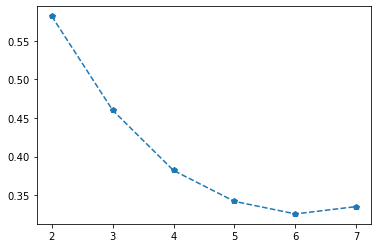

In [65]:
plt.plot(range(2,8), sil_acc, 'p--')

In [66]:
mod = KMeans(n_clusters=3)
mod.fit(X_scaled)
mod.predict(X_scaled)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

In [69]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

In [70]:
X, y = make_moons(n_samples=1000, noise=0.05)

In [76]:
dbscan = DBSCAN(eps=0.2, min_samples=5)

In [77]:
dbscan.fit(X)

DBSCAN(eps=0.2)